In [1]:
import pandas as pd
import os

data_folder = 'data'
filename = 'data.json'

data_path = os.path.join(data_folder, filename)
df = pd.read_json(data_path)

In [2]:
df.head()

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029


In [3]:
df.describe()

,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
count,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000,1347.000000
mean,4.307350,4.307350,12.895320,25.448011,2.920388,11.022443,20.405499,3.146246,14.768198,24.848020,5.521437
std,0.814412,0.814412,21.839948,42.758159,9.258972,19.136320,33.189081,9.559611,26.047057,42.345579,14.460565
min,4.000000,4.000000,0.192973,0.323886,0.007456,0.134686,0.178059,0.007456,0.123169,0.220846,0.009268
25%,4.000000,4.000000,0.658488,1.243804,0.147432,0.514150,0.888043,0.164668,0.742915,1.180960,0.306071
50%,4.000000,4.000000,2.123456,4.703514,0.279876,1.932503,4.008014,0.304374,2.159995,3.777277,0.600597
75%,4.000000,4.000000,14.810982,28.312051,0.674444,13.430288,24.986504,0.801416,15.150233,27.551533,1.840563
max,10.000000,10.000000,121.301055,179.165483,81.764483,121.244083,177.961811,81.791505,157.387474,179.165483,144.472533


In [4]:
df.shape

(1347, 12)

In [5]:
len(df[df['min'] < 5])

1203

In [6]:
(df['gt_corners'] == df['rb_corners']).all()

True

### В предоставленных данных колонки gt_corners и rb_corners содержат идентичные значения. Это вызывает сомнения в достоверности результатов модели, так как указывает на возможную ошибку в сборе данных или на проблему в самой модели. В реальных условиях такие показатели не могут быть одинаковыми, если модель действительно делает прогнозы.

In [7]:
df.nunique()

name             588
gt_corners         4
rb_corners         4
mean            1347
max             1347
min             1347
floor_mean      1347
floor_max       1347
floor_min       1347
ceiling_mean    1347
ceiling_max     1347
ceiling_min     1347
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1347 entries, 0 to 1346
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1347 non-null   object 
 1   gt_corners    1347 non-null   int64  
 2   rb_corners    1347 non-null   int64  
 3   mean          1347 non-null   float64
 4   max           1347 non-null   float64
 5   min           1347 non-null   float64
 6   floor_mean    1347 non-null   float64
 7   floor_max     1347 non-null   float64
 8   floor_min     1347 non-null   float64
 9   ceiling_mean  1347 non-null   float64
 10  ceiling_max   1347 non-null   float64
 11  ceiling_min   1347 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 136.8+ KB


In [9]:
df.isna().sum()

name            0
gt_corners      0
rb_corners      0
mean            0
max             0
min             0
floor_mean      0
floor_max       0
floor_min       0
ceiling_mean    0
ceiling_max     0
ceiling_min     0
dtype: int64

### Создание рисунков

In [11]:
from plot_drawer import PlotDrawer

output_foler = 'plots'
output_path = os.path.join(data_folder, output_foler)
drawer = PlotDrawer(output_path)
paths = drawer.draw_plots(data_path)

print("Plots saved at:")
for path in paths:
        print(path)

Plots saved at:
data\plots\mean_deviation_distribution.png
data\plots\deviation_boxplot.png
data\plots\deviation_floor_boxplot.png
data\plots\deviation_ceiling_boxplot.png
data\plots\scatter_plot.png
data\plots\pairplot.png
data\plots\mean_deviation_relplot.png
data\plots\gt_corners_histplot.png


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

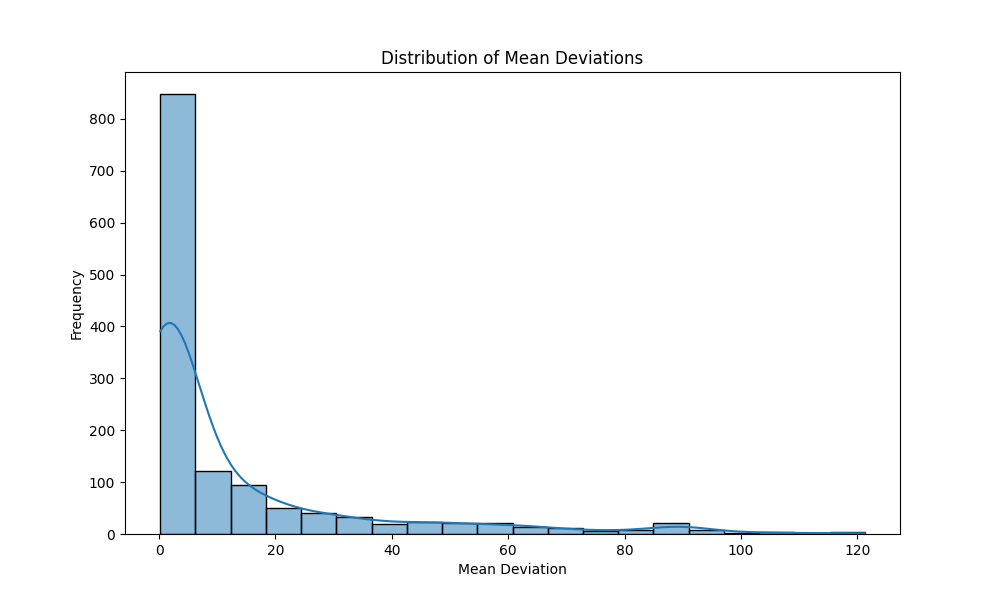

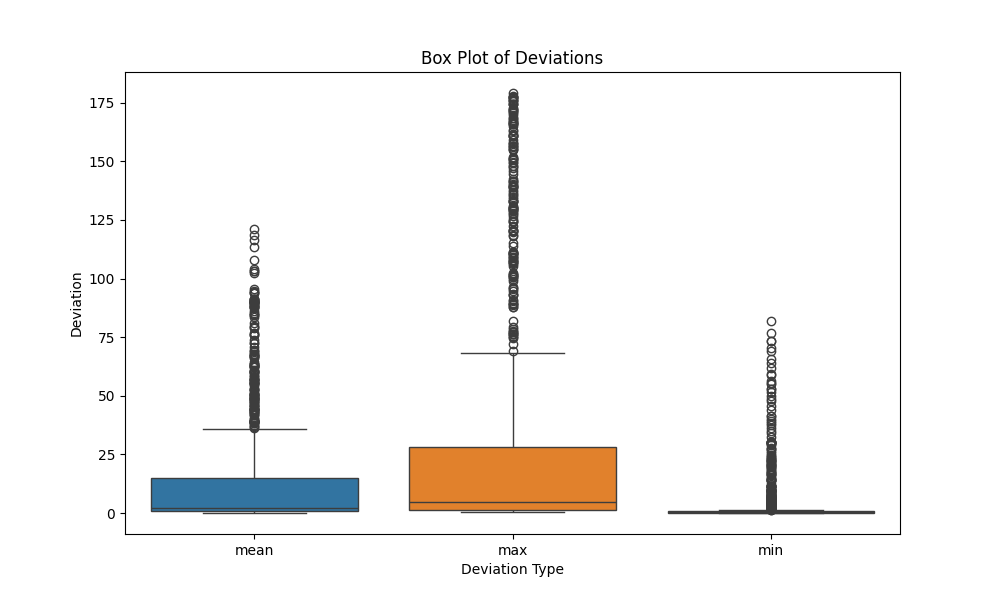

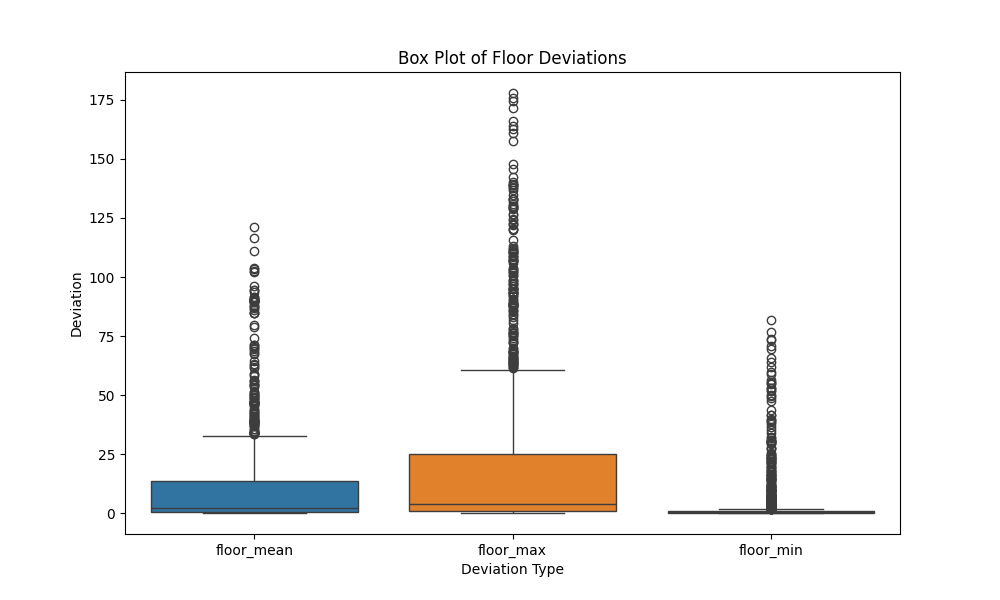

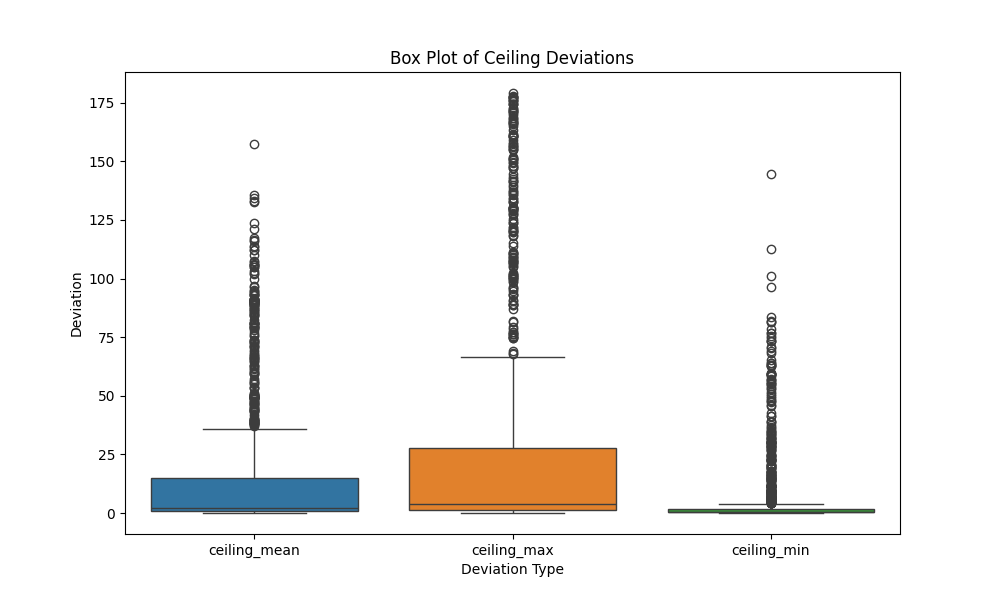

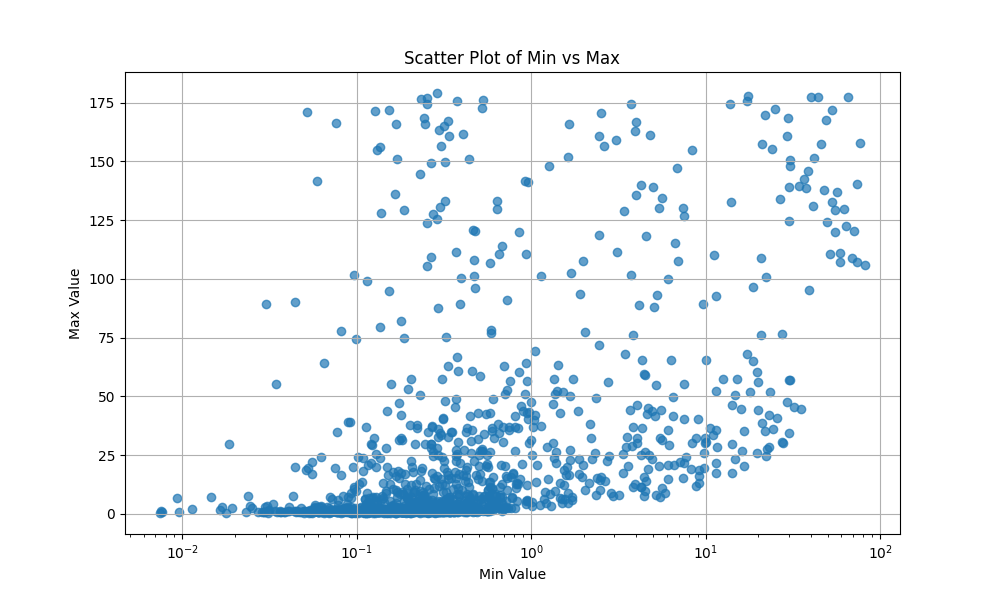

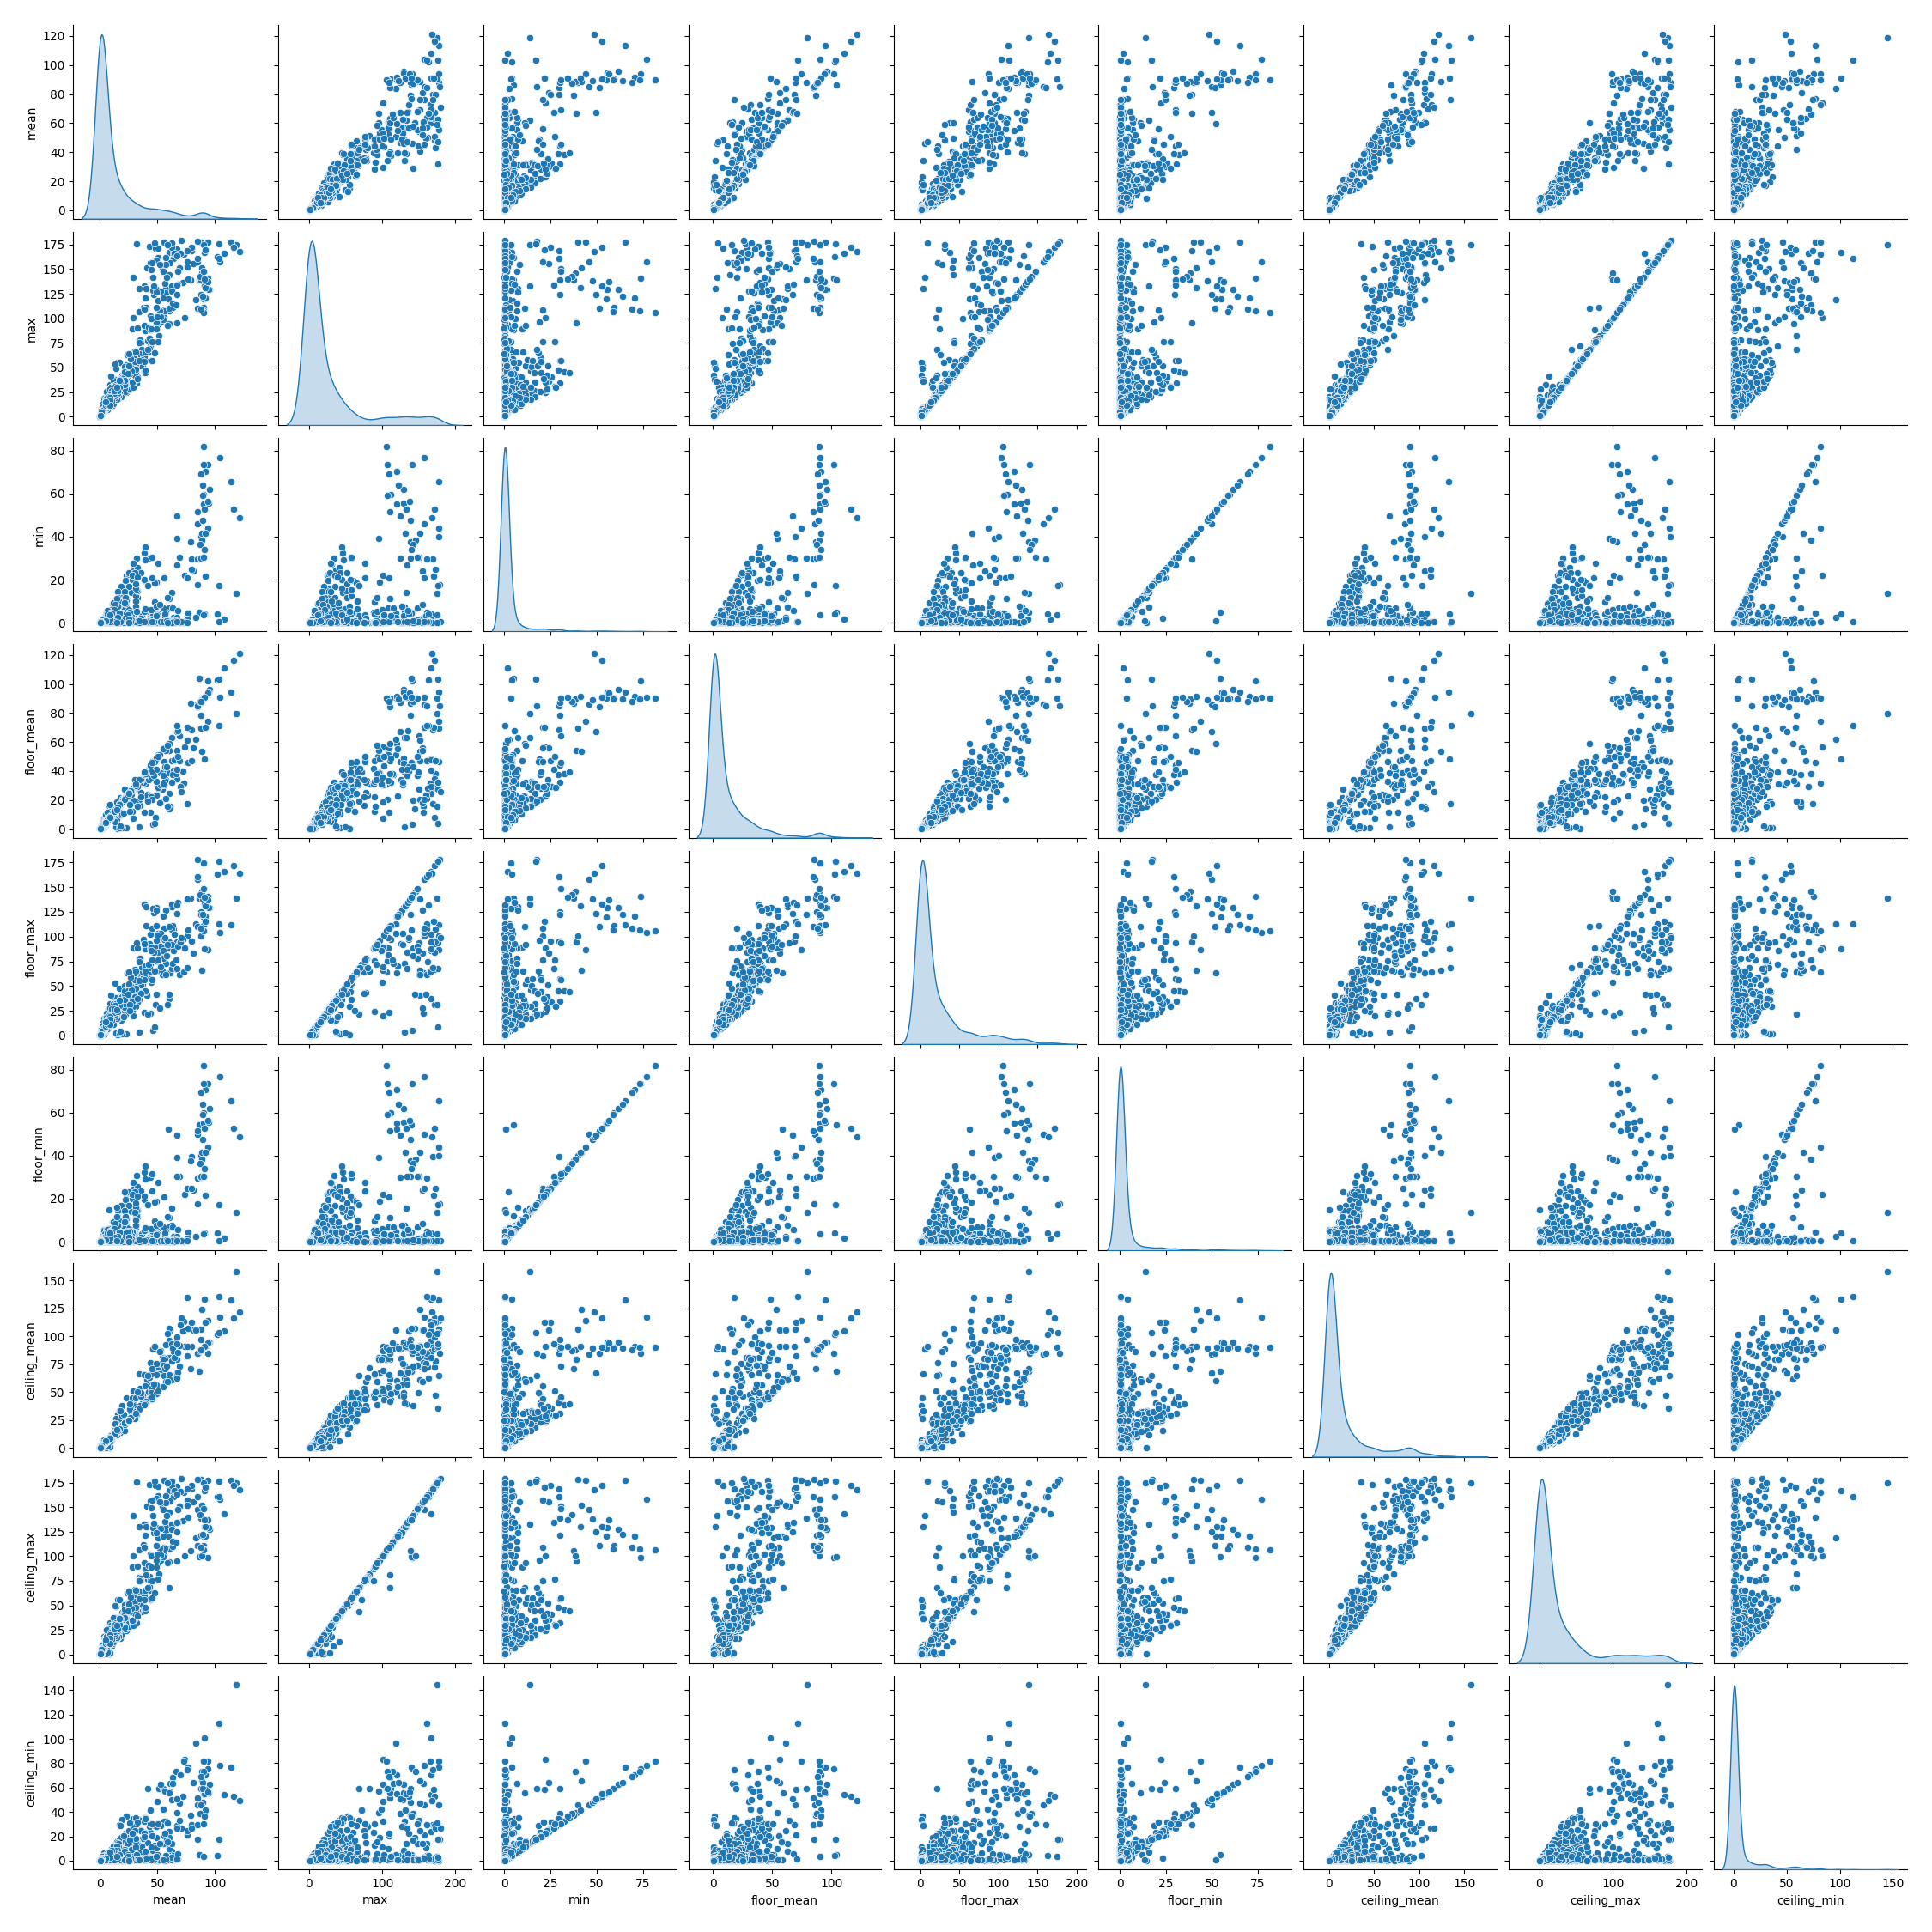

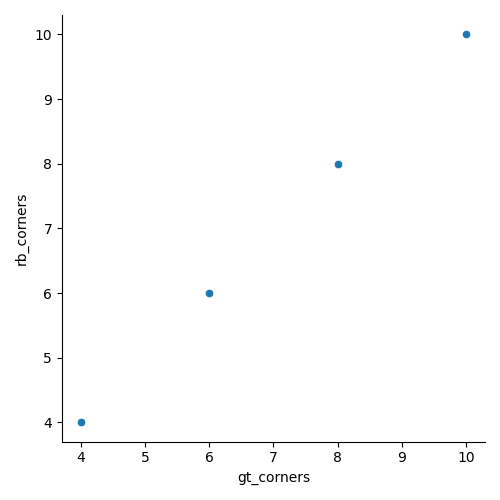

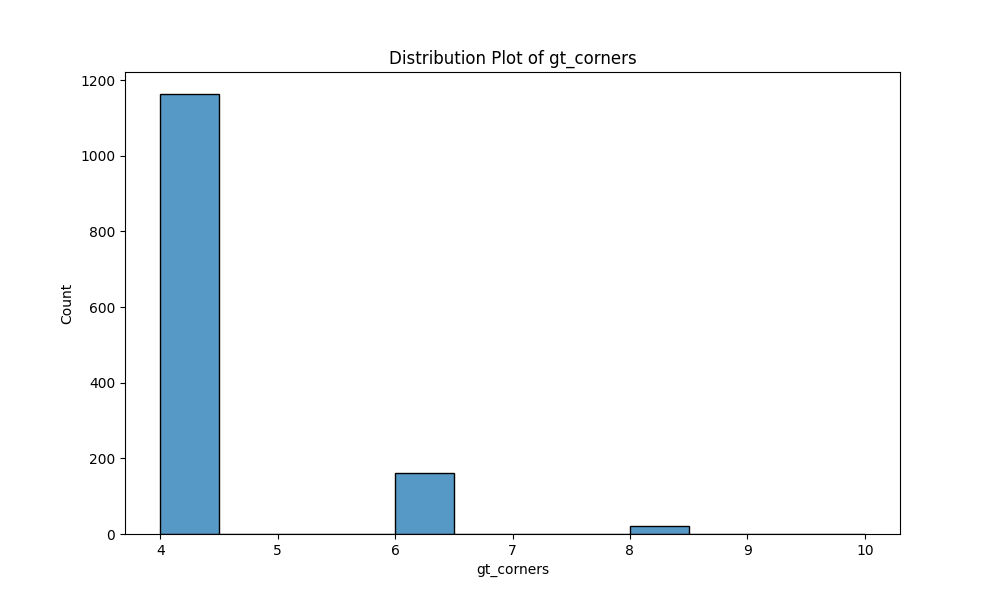

In [12]:
from IPython.display import Image, display

for path in paths:
    display(Image(filename=path))